# Classification with Bank Data
<b>Goal:</b> Using the bank-additional-full.csv file, correctly predict whether or not a customer will subscribe to a loan deposit.

## Descriptive information for the study and the dataset:
<b>Link:</b> http://archive.ics.uci.edu/ml/datasets/Bank+Marketing <br>
<br><b>Study Implications:</b> There are two datasets containing all the instances. bank-full.csv is the chosen one to develop our model since it focuses on information which is less dependent on macro-economic factors. The reasoning behind this is that macro-economic factors will likely dictate how much the bank should scale up or down marketing spend, but it should not be the basis for determining who should be included in the target market. Macro-economic factors are relatively unpredictable and shouldn't necessarily be the basis of developing a target market in any company's overall marketing strategy. Instead, for the purposes of this study, only personal demographic information is used. Furthermore, other demographic information, like 'job' and 'loan,' may be sufficient in reflecting the current implications of the macro-environment on the individual at the micro-level, which is what this study focuses on. In a regression model, the macro-level factors for social and economic context would be included. The ultimate implication of this classification study is to determine which customers are most likely to subscribe to a loan deposit, and therefore how the company ought to select its target market, and how to position its loan products to that cohort. Ultimately, this study will aid the bank in developing it's marketing strategy including decisions related to product, price, place, and promotions. <br>
<br>
<br>
### Data Description: 
#### Input Variables:
><b>Demographic Variables:</b> <br>
>1 - age (numeric)<br>
2 - job : type of job (categorical: 'admin.','blue- collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown') <br>
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed) <br>
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown') <br>
5 - default: has credit in default? (categorical: 'no','yes','unknown') <br>
6 - housing: has housing loan? (categorical: 'no','yes','unknown') <br>
7 - loan: has personal loan? (categorical: 'no','yes','unknown') <br>
><b>Last Contact from the Current Campaign Variables:</b> <br>
8 - contact: contact communication type (categorical: 'cellular','telephone')<br>
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')<br>
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')<br>
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.<br>
><b>Other Attribute Variables:</b> <br>
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact) <br>
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted) <br>
14 - previous: number of contacts performed before this campaign and for this client (numeric)<br>
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')<br>
<br>
#### Output variable (Target Variable):
>16 - y - has the client subscribed a term deposit? (binary: 'yes','no') <br>

#### Omitted Variables:
><b>Social and Economic Context Variables:</b> <br>
> - emp.var.rate: employment variation rate - quarterly indicator (numeric) <br>
> - cons.price.idx: consumer price index - monthly indicator (numeric) <br>
> - cons.conf.idx: consumer confidence index - monthly indicator (numeric) <br>
> - euribor3m: euribor 3 month rate - daily indicator (numeric) <br>
> - nr.employed: number of employees - quarterly indicator (numeric) <br>
<br>


## What is a term deposit?
>A term deposit is a hybrid bank account and investment account. It is similar to a bond which yields a relatively low interest rate, but normally has short maturity dates compared to bonds, thereby making them more accessable as cash in the near future. Term deposits will normally mature between one month and a couple years while some bonds can mature in decades. The best example of a term deposit is a CD, or Certificate of Deposit. These instruments are very useful for banks because they provide more dependability of deposits.
### Why is dependability of deposits important for banks?
>Have you ever heard of a run on a bank? The Great Depression of the early 1900's was partly caused by a nationwide financial scare where everyone was trying to get their money out of the banking system at once. This was detrimental to banks, and is an issue which modern day bank regulators (OCC, Federal Reserve, and local authorities) scrutinize heavily to prevent such economic fallout from ever occurring again. Banks must keep a sufficient amount of money in reserves for both bad loan expenses (defaults) and to meet the withdrawal needs of their customers, or depositors. If there are not sufficient reserves in a bank to meet both of those requirements, and other expenses of the bank, then that bank could fail. So, besides just simply holding a sufficient amount of cash in reserves with cushion, banks can also use term deposits to ensure that those reserves are more stable. Higher quality deposits are an effective means of reducing the overall risk of a bank's loan portfolio, or balance sheet. Essentially, term deposits offer higher rates to depositors, but the catch is that the term deposit cannot be withdrawn for a period of time. If it is withdrawn early, there will be a penalty imposed. In conclusion, term deposits, or CDs, are an important way for banks to reduce risk, and it is important for them to effectively target customers who may be interested in such securities. 

## Citations:
>[Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014
<br>
<br>
>Chen, J. (2020, September 16). Term deposit definition. Retrieved March 12, 2021, from https://www.investopedia.com/terms/t/termdeposit.asp

### Locate bank-additional-full.csv in working directory:

In [1]:
#pip install os_sys

In [2]:
import os
cwd = os.getcwd()
print(cwd)

### List of files in current working directory:

In [3]:
os.listdir()

### Exploratory Analysis of original bank-additional-full.csv:

In [4]:
import pandas as pd
df = pd.read_csv('bank-additional-full.csv', sep=';', header=0)
type(df)

pandas.core.frame.DataFrame

> drop macro-related variables

In [5]:
macro_lst = ['emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']

for i in macro_lst:
    df.drop([i], axis=1, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          41188 non-null  int64 
 1   job          41188 non-null  object
 2   marital      41188 non-null  object
 3   education    41188 non-null  object
 4   default      41188 non-null  object
 5   housing      41188 non-null  object
 6   loan         41188 non-null  object
 7   contact      41188 non-null  object
 8   month        41188 non-null  object
 9   day_of_week  41188 non-null  object
 10  duration     41188 non-null  int64 
 11  campaign     41188 non-null  int64 
 12  pdays        41188 non-null  int64 
 13  previous     41188 non-null  int64 
 14  poutcome     41188 non-null  object
 15  y            41188 non-null  object
dtypes: int64(5), object(11)
memory usage: 5.0+ MB


>none of the data is nan, so 5% of the values will be randomly imputed as np.nan values

In [171]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import roc_auc_score

>set random seed for reproducibility

In [7]:
np.random.seed(100)

In [8]:
nan_mat = np.random.random(df.shape)<0.05
nan_mat.shape

(41188, 16)

In [9]:
# of nans
n = nan_mat.sum()
n

32910

In [10]:
# approximately 5% of the dataset will be set to nan
n/(41188*16)

0.04993869573662232

In [11]:
dfn = df.mask(nan_mat)
dfn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          39123 non-null  float64
 1   job          39153 non-null  object 
 2   marital      39113 non-null  object 
 3   education    39113 non-null  object 
 4   default      39094 non-null  object 
 5   housing      39205 non-null  object 
 6   loan         39131 non-null  object 
 7   contact      39116 non-null  object 
 8   month        39284 non-null  object 
 9   day_of_week  39088 non-null  object 
 10  duration     39046 non-null  float64
 11  campaign     39028 non-null  float64
 12  pdays        39175 non-null  float64
 13  previous     39146 non-null  float64
 14  poutcome     39105 non-null  object 
 15  y            39178 non-null  object 
dtypes: float64(5), object(11)
memory usage: 5.0+ MB


In [12]:
# 5% of new data frame is nan

nnan = dfn.isnull().sum().sum()
ntot = dfn.shape[1]*dfn.shape[0]
percent_nan = nnan/ntot

print(percent_nan)

0.04993869573662232


### Export new copy of data with 5% NaN
><b>Named:</b> bank_data_new.csv

In [13]:
dfn.to_csv('bank_data_new.csv')

# Data Preprocessing and Preparation for ML Classification Algorithms:

In [14]:
dfn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          39123 non-null  float64
 1   job          39153 non-null  object 
 2   marital      39113 non-null  object 
 3   education    39113 non-null  object 
 4   default      39094 non-null  object 
 5   housing      39205 non-null  object 
 6   loan         39131 non-null  object 
 7   contact      39116 non-null  object 
 8   month        39284 non-null  object 
 9   day_of_week  39088 non-null  object 
 10  duration     39046 non-null  float64
 11  campaign     39028 non-null  float64
 12  pdays        39175 non-null  float64
 13  previous     39146 non-null  float64
 14  poutcome     39105 non-null  object 
 15  y            39178 non-null  object 
dtypes: float64(5), object(11)
memory usage: 5.0+ MB


### Data Imputations:

> Strategy for imputing age values:

In [15]:
a = pd.DataFrame(dfn.groupby(dfn['job']).agg(pd.Series.mode))
a

,age,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
job,,,,,,,,,,,,,,,
admin.,33.0,married,university.degree,no,yes,no,cellular,may,mon,105.0,1.0,999.0,0.0,nonexistent,no
blue-collar,36.0,married,basic.9y,no,yes,no,cellular,may,wed,128.0,1.0,999.0,0.0,nonexistent,no
entrepreneur,37.0,married,university.degree,no,yes,no,cellular,may,mon,"[69.0, 85.0]",1.0,999.0,0.0,nonexistent,no
housemaid,39.0,married,basic.4y,no,yes,no,cellular,may,tue,129.0,1.0,999.0,0.0,nonexistent,no
management,36.0,married,university.degree,no,yes,no,cellular,may,mon,89.0,1.0,999.0,0.0,nonexistent,no
retired,59.0,married,basic.4y,no,yes,no,cellular,aug,tue,188.0,1.0,999.0,0.0,nonexistent,no
self-employed,33.0,married,university.degree,no,yes,no,cellular,may,thu,139.0,1.0,999.0,0.0,nonexistent,no
services,31.0,married,high.school,no,yes,no,cellular,may,thu,158.0,1.0,999.0,0.0,nonexistent,no
student,24.0,single,high.school,no,yes,no,cellular,may,thu,136.0,1.0,999.0,0.0,nonexistent,no


> check if retired, student, and unknown represent a significant number of the total dataset to justify their use in the aggregate to impute values for the age column

In [16]:
# number of housemaids
print('Number of Retirees:')
print(dfn[dfn['job']=='retired'].shape[0])
print('Number of Students:')
print(dfn[dfn['job']=='student'].shape[0])
print('Number of Unknowns:')
print(dfn[dfn['job']=='unknown'].shape[0])

Number of Retirees:
1640
Number of Students:
827
Number of Unknowns:
311


> Informed Assumption: <br>
>There are a sufficient number of observations representing each of the above job descriptions to make strategic data imputations where the missing values will be replaced using the mode for each category. Another assumption is that age is perhaps one of the most valuable demographic pieces of information because it is highly ocrrelated with one's stage in life, and corresponding need for term deposit type products.

In [17]:
# impute np.nan values in age for the following observations: 
# housemaid, retired, student, unknown

for lab, cont in dfn.iterrows():
    age = cont['age']
       
    if cont['job']=='retired':age =59
        
    if cont['job']=='student':age=24
    
    if cont['job']=='unknown':age=45
    
        
    if pd.isnull(cont['age'])==True: dfn.loc[lab,'age'] = age

> impute all NaN values

In [18]:
# import the rest of the nan values in the dataset with their respective modes
colnames = dfn.columns.to_list()

for n in colnames:
    mode = dfn[n].mode()[0]
    dfn[n].fillna(mode, inplace=True)

In [19]:
dfn.isnull().sum()

age            0
job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
y              0
dtype: int64

### Preprocessing Data for ML Classification ALgorithms

In [20]:
dfn

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261.0,1.0,999.0,0.0,nonexistent,no
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,85.0,1.0,999.0,0.0,nonexistent,no
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,226.0,1.0,999.0,0.0,nonexistent,no
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,85.0,1.0,999.0,0.0,nonexistent,no
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,307.0,1.0,999.0,0.0,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73.0,retired,married,professional.course,no,yes,no,cellular,nov,fri,334.0,1.0,999.0,0.0,nonexistent,yes
41184,46.0,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383.0,1.0,999.0,0.0,nonexistent,no
41185,56.0,retired,married,university.degree,no,yes,no,cellular,nov,fri,189.0,2.0,999.0,0.0,nonexistent,no
41186,44.0,technician,married,professional.course,no,no,no,cellular,nov,fri,442.0,1.0,999.0,0.0,nonexistent,yes


> replace categorical columns with dummy variable columns. Categorical Columns include: <br>
'job','marital','education','contact','month','day_of_week','poutcome'

In [21]:
#replace categorical columns with dummies
# columns to replace: 
# 'job','marital','education','contact','month','day_of_week'
cat_vars = ['job','marital','education','contact','month','day_of_week','poutcome']

fdf = dfn.copy()

dfdum_list=[]

for cat in cat_vars:
    temp_df = pd.DataFrame(pd.get_dummies(dfn[cat]))
    dfdum_list.append(temp_df)
    
    fdf.drop(cat, axis=1, inplace=True)

    
dfdum_list.append(fdf)

fdf = pd.concat(dfdum_list, axis=1)

In [22]:
fdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 53 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   admin.               41188 non-null  uint8  
 1   blue-collar          41188 non-null  uint8  
 2   entrepreneur         41188 non-null  uint8  
 3   housemaid            41188 non-null  uint8  
 4   management           41188 non-null  uint8  
 5   retired              41188 non-null  uint8  
 6   self-employed        41188 non-null  uint8  
 7   services             41188 non-null  uint8  
 8   student              41188 non-null  uint8  
 9   technician           41188 non-null  uint8  
 10  unemployed           41188 non-null  uint8  
 11  unknown              41188 non-null  uint8  
 12  divorced             41188 non-null  uint8  
 13  married              41188 non-null  uint8  
 14  single               41188 non-null  uint8  
 15  unknown              41188 non-null 

> drop unknown columns as they are less information rich

In [23]:
fdf.drop('unknown', axis=1, inplace=True)
fdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 50 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   admin.               41188 non-null  uint8  
 1   blue-collar          41188 non-null  uint8  
 2   entrepreneur         41188 non-null  uint8  
 3   housemaid            41188 non-null  uint8  
 4   management           41188 non-null  uint8  
 5   retired              41188 non-null  uint8  
 6   self-employed        41188 non-null  uint8  
 7   services             41188 non-null  uint8  
 8   student              41188 non-null  uint8  
 9   technician           41188 non-null  uint8  
 10  unemployed           41188 non-null  uint8  
 11  divorced             41188 non-null  uint8  
 12  married              41188 non-null  uint8  
 13  single               41188 non-null  uint8  
 14  basic.4y             41188 non-null  uint8  
 15  basic.6y             41188 non-null 

> Replace ordinal columns with binary output. Columns to be mapped to ordinal ones include:<br>housing, loan, default

In [24]:
print('housing unique & mode')
print(fdf['housing'].unique())
hm = fdf['housing'].mode()[0]
print(hm)

print('loan unique & mode')
print(fdf['loan'].unique())
lm = fdf['loan'].mode()[0]
print(lm)

print('default unique & mode')
print(fdf['default'].unique())
dm = fdf['default'].mode()[0]
print(dm)

fdf['housing'].replace('unknown',hm, inplace=True)
fdf['loan'].replace('unknown',lm, inplace=True)
fdf['default'].replace('unknown',dm, inplace=True)

housing unique & mode
['no' 'yes' 'unknown']
yes
loan unique & mode
['no' 'yes' 'unknown']
no
default unique & mode
['no' 'unknown' 'yes']
no


In [25]:
fdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 50 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   admin.               41188 non-null  uint8  
 1   blue-collar          41188 non-null  uint8  
 2   entrepreneur         41188 non-null  uint8  
 3   housemaid            41188 non-null  uint8  
 4   management           41188 non-null  uint8  
 5   retired              41188 non-null  uint8  
 6   self-employed        41188 non-null  uint8  
 7   services             41188 non-null  uint8  
 8   student              41188 non-null  uint8  
 9   technician           41188 non-null  uint8  
 10  unemployed           41188 non-null  uint8  
 11  divorced             41188 non-null  uint8  
 12  married              41188 non-null  uint8  
 13  single               41188 non-null  uint8  
 14  basic.4y             41188 non-null  uint8  
 15  basic.6y             41188 non-null 

> Convert Ordinal Columns into binary where 1/0 is yes/no, respectively.<br>
Columns to be converted: default, housing, loan, y

In [26]:
ordlst = ['default', 'housing', 'loan', 'y']

for i in ordlst:
    fdf[i].replace('yes', 1, inplace=True)
    fdf[i].replace('no', 0, inplace=True)

>Dataset's variables are now in their appropriate numeric form for ML algorithms to operate on them.

In [27]:
fdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 50 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   admin.               41188 non-null  uint8  
 1   blue-collar          41188 non-null  uint8  
 2   entrepreneur         41188 non-null  uint8  
 3   housemaid            41188 non-null  uint8  
 4   management           41188 non-null  uint8  
 5   retired              41188 non-null  uint8  
 6   self-employed        41188 non-null  uint8  
 7   services             41188 non-null  uint8  
 8   student              41188 non-null  uint8  
 9   technician           41188 non-null  uint8  
 10  unemployed           41188 non-null  uint8  
 11  divorced             41188 non-null  uint8  
 12  married              41188 non-null  uint8  
 13  single               41188 non-null  uint8  
 14  basic.4y             41188 non-null  uint8  
 15  basic.6y             41188 non-null 

## Test for Imbalance
>Before the model can be split into train and test datasets, the dataset needs to be assessed for imbalance. If the dataset is imbalanced, then it may be difficult to predict the target variable in a meaningful way using traditional scoring techniques. Another name for this type of issue in a classification model is rare event prediction. Imbalance can be expressed as a simple ratio. Technically, anything other than equal representation is considered imbalanced, but slight imbalance is not a significant problem. For our purposes, a ratio less than 0.2 will be considered imbalanced. In other words, if less than 20% of the observations in our dataset have a value of 'yes' or 1 in the target column, then the dataset will be considered significantly imbalanced and adjustments will be necessary.<br><br>
In order to adjust for imbalance, a different scoring method will be used to assess each model. The roc_auc_score method will be used because it accounts for recall and the FPR (False Positive Rate). It is important to maximize the recall in whatever model is finally selected because it will ensure that a sufficient number of the most likely customers to subscribe to a term deposit are marketed to. The recall measures how many out of all of the positive target variables are correctly calssified. Also, we want to minimize the FPR because it wastes the bank's money too market to those who are unlikely to subscribe to a term deposit.


In [28]:
n_of_y = list(fdf['y']).count(1)
tot = fdf.shape[0]
ratio_of_y = n_of_y/tot
print('Total number of y in fbf dataset:')
print(n_of_y)
print()
print('Ratio of y in the target column in fbf dataframe:')
print(ratio_of_y)

Total number of y in fbf dataset:
4415

Ratio of y in the target column in fbf dataframe:
0.1071914149752355


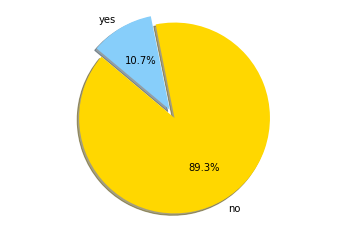

In [53]:
import matplotlib.pyplot as plt

# Data to plot
labels = 'no','yes'
num_no = list(fdf['y']).count(0)
num_yes = list(fdf['y']).count(1)
sizes = [num_no,num_yes]
colors = ['gold','lightskyblue']
explode = (0.1, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

> This dataset is significantly imbalanced, so adjustments will have to be made. Specifically, the scoring method used throughout this notebook for each classification model will be the roc_auc_score method in the sklearn package. This scoring method aims to maximize the recall, while minimizing the false positive rate. The interpretation of this for the bank is that this new scoring function will aim to minimize the number of customers who are marketed to who are unlikely to subscribe to a term deposit.

#### Train/Test data split
>The data will be split into train and test datasets that will be used for all of the models. <br><br>
<b>Regularization:</b><br>
Importantly, the MinMaxScaler() function will be applied to the data at the same time as the train/test split. The MinMaxScaler() function is a commonly used regularization function which transforms all variables in each column to a value between 0-1 relative to other values in that variable. Regularization is applied to ensure that every factor in the dataset is weighed equally when distance-based classification models are applied. In models like support vector machines, the distance between points matters as that is the technique used to classify the data. Furthermore, Regularization will not affect non-distance-based calssification models. Therefore, standardization of the data is a critical first step regardless of whether classification or regression models are employed. 

In [54]:
y = fdf['y']
#y

0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: y, Length: 41188, dtype: int64

In [55]:
x = fdf.drop('y', axis=1)
#x

>The dependent variables and the target variable columns have been separated into two datasets. When the data is split into train/test sets, observations will be randomly selected for each, therefore ensuring the train/test datasets accurately represent the original dataset.

In [56]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

x_train, x_test, y_train, y_test = train_test_split(
    x, y, random_state = 0)

scaler = preprocessing.MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

>Data has now been preprocessed and is ready for ML Classification Algorithms.

## Classification Models:
##### Models Used: 
>KNN classification, Logistic Regression, Linear Support Vector Machine (SVM), Kernelized Support Vector Machine (rbf, poly, and linear), and Decision Tree Classifier. <br> <br>
>Intermediate models will be chosen based on maximizing the test scores.

### KNN Classification

In [58]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

#best implementation
knn = KNeighborsClassifier()
param_grid = {'n_neighbors': [5, 10, 15, 20, 30, 40, 50]}
knn_grid = GridSearchCV(knn, param_grid, cv = 5, n_jobs = -1, scoring = 'roc_auc')
knn_grid.fit(x_train, y_train) #imbalance X_



GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [5, 10, 15, 20, 30, 40, 50]},
             scoring='roc_auc')

In [59]:
knn_grid.best_params_

{'n_neighbors': 50}

In [60]:
knn_score = knn_grid.best_score_
print(knn_score)

0.7852809442880953


### Logistic Regression

In [65]:
from sklearn.linear_model import LogisticRegression

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'max_iter': [50,100,500,1000]}

logreg = LogisticRegression(random_state=0)
logreg_grid = GridSearchCV(logreg, param_grid, cv = 5, n_jobs = -1, scoring = 'roc_auc')
logreg_grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=0), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'max_iter': [50, 100, 500, 1000]},
             scoring='roc_auc')

In [66]:
logreg_grid.best_params_

{'C': 10, 'max_iter': 500}

In [68]:
logreg_score = logreg_grid.best_score_
print(logreg_score)

0.8912335133794669


In [88]:
# convert pandas series to numpy arrays for use in following models
y_test = np.array(y_test)
y_train = np.array(y_train)

### Linear SVM

In [94]:
from sklearn.svm import LinearSVC
from mlxtend.plotting import plot_decision_regions

lsvc = LinearSVC(random_state=0)

param_grid = {'C': [.001,.01,.1,1,10,100]}

lsvc_grid = GridSearchCV(lsvc, cv = 5, param_grid=param_grid, n_jobs = -1, scoring = 'roc_auc')
lsvc_grid.fit(x_train, y_train)

lsvm_score = lsvc_grid.best_score_
print(lsvm_score)

0.893030724337823


In [95]:
lsvc_grid.best_params_

{'C': 1}

### Kernelized SVM - rbf

In [97]:
from sklearn.svm import SVC

param_grid = {'C': [.001,.01,.1,1,10,100], 'gamma': [.001,.01,.1,1,10,100]}

svcr = SVC(kernel='rbf', random_state=0)

svcr_grid = GridSearchCV(svcr, cv=5, param_grid=param_grid, n_jobs=-1, scoring = 'roc_auc')

svcr_grid.fit(x_train, y_train)

rsvc_score = svcr_grid.best_score_
print(rsvc_score)

0.8879656201588585


In [98]:
svcr_grid.best_params_

{'C': 1, 'gamma': 0.01}

### Kernelized SVM - poly

In [101]:
from sklearn.svm import SVC

param_grid = {'C': [.001,.01,.1,1,10,100]}

svcp = SVC(kernel='poly', degree=3, random_state=0, coef0=1)

svcp_grid = GridSearchCV(svcp, cv=5, param_grid=param_grid, n_jobs=-1, scoring = 'roc_auc')

svcp_grid.fit(x_train, y_train)

psvc_score = svcp_grid.best_score_
print(psvc_score)

0.8751163200737192


In [102]:
svcp_grid.best_params_

{'C': 0.1, 'coef0': 1}

### Kernelized SVM - linear

>Optimal C-value is 100

In [103]:
from sklearn.svm import SVC

param_grid = {'C': [.001,.01,.1,1,10,100]}

lsvc = SVC(kernel='linear', random_state=0)

lsvc_grid = GridSearchCV(lsvc, cv=5, param_grid=param_grid, n_jobs=-1, scoring = 'roc_auc')

lsvc_grid.fit(x_train, y_train)

0.8885937729135224


In [164]:
lsvc_score = lsvc_grid.best_score_
print(lsvc_score)

0.8885937729135224


In [104]:
lsvc_grid.best_params_

{'C': 100}

### Decision Tree

In [105]:
from sklearn.tree import DecisionTreeClassifier

midlst= [.001,.005,.01,.05,.1] # these numbers are relatively arbitrary
msllst= [30,60,120,240,480] # below a sample of size n=30 is not significant enough to justify its own leaf
msslst= [30,60,120,240,480] 
mdlst= [20,30,40,50,60,70] # too large of a tree will lose its interpretability, and therefore its business value. May consider further trimming.

param_grid = {'min_impurity_decrease': midlst, 'min_samples_leaf': msllst, 'min_samples_split': msslst, 'max_depth': mdlst}

tree = DecisionTreeClassifier(random_state=0)
tree_grid = GridSearchCV(tree, param_grid=param_grid, cv=5, n_jobs=-1, scoring='roc_auc')

tree_grid.fit(x_train,y_train)

0.8302538447163368

In [108]:
dtree_score = tree_grid.best_score_
print(dtree_score)

0.8302538447163368


In [106]:
tree_grid.best_params_

{'max_depth': 20,
 'min_impurity_decrease': 0.001,
 'min_samples_leaf': 30,
 'min_samples_split': 30}

In [ ]:
#pip install dtreeviz

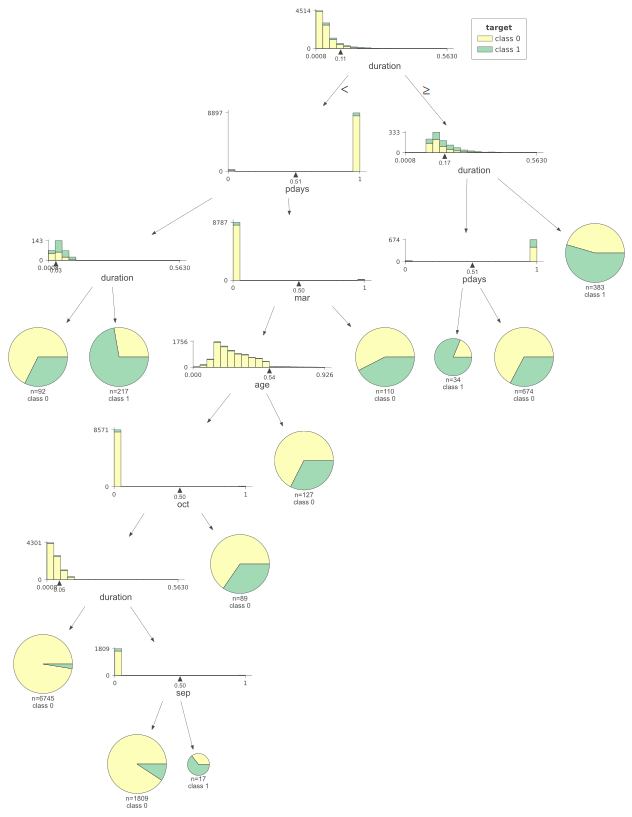

In [107]:
import graphviz

#os.environ["PATH"] += os.pathsep + cwd

tree = DecisionTreeClassifier(random_state=0, 
                              min_impurity_decrease=.001,
                              min_samples_leaf=30, 
                              min_samples_split = 30, 
                              max_depth= 20)
tree.fit(x_train,y_train)


from dtreeviz.trees import dtreeviz # remember to load the package

viz = dtreeviz(tree, x_test, y_test,
                target_name="target",
                feature_names=list(x.columns))

viz 

In [ ]:
# to save above decision tree to your current working directory, use below code
viz.save("Bank_TermLoan_tree.svg")

>The optimal values for the decision tree model are as follows:<br>
min_impurity_decrease:     0.001<br>
min_samples_leaf:     30<br>
min_samples_split:     60<br>
max_depth:     70<br>
<br>
It is important to remember that the above decision tree was simply used for classification based on accuracy, not interpretability. Obviously, the above tree would need to be pruned significantly if interpretability were the objective.

In [220]:
all_results=[knn_score,logreg_score,lsvm_score,lsvc_score,rsvc_score,psvc_score,lsvc_score,dtree_score]
all_res_str = ['knn_score','logreg_score','lsvm_score','lsvc_score','rsvc_score','psvc_score','lsvc_score','dtree_score']

counter=0

for i in all_results:
    
    if i == max(all_results):
        best_pre_optimization_model = all_res_str[counter]
    
    counter+=1
    
max_val = max(all_results)

print('Best Pre-Optimization Model:     ' +str(best_pre_optimization_model))
print('Score of Linear SVC:     '+str(max_val))

Best Pre-Optimization Model:     lsvm_score
Score of Linear SVC:     0.893030724337823


In [221]:
df = pd.concat([pd.Series(all_res_str), pd.Series(all_results), ], axis=1)   
df

,0,1
0,knn_score,0.785281
1,logreg_score,0.891234
2,lsvm_score,0.893031
3,lsvc_score,0.888594
4,rsvc_score,0.887966
5,psvc_score,0.875116
6,lsvc_score,0.888594
7,dtree_score,0.830254


>Based on the maximum grid search roc_auc score, the Linear Support Vector Classification Model was the highest performing model in correctly calssifying whether a potential customer would subscribe to a term loan or not. Therefore, this model will be the subject of further analysis and optimization.

## Optimization of Linear SVC Model on Entire Dataset:
>For the final model, the entire dataset will be used to train the model. Although the dataset is imbalanced, there are other means of improving the model using ROC curves which includes precision and recall metrics. Again, the scoring function used will be the roc_auc scoring method as it aims to minimize the number of false positives and maximize the number of true positives so that the bank does not waste more money marketing to those who are unlikely to subscribe to a term deposit.

In [111]:
fdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 50 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   admin.               41188 non-null  uint8  
 1   blue-collar          41188 non-null  uint8  
 2   entrepreneur         41188 non-null  uint8  
 3   housemaid            41188 non-null  uint8  
 4   management           41188 non-null  uint8  
 5   retired              41188 non-null  uint8  
 6   self-employed        41188 non-null  uint8  
 7   services             41188 non-null  uint8  
 8   student              41188 non-null  uint8  
 9   technician           41188 non-null  uint8  
 10  unemployed           41188 non-null  uint8  
 11  divorced             41188 non-null  uint8  
 12  married              41188 non-null  uint8  
 13  single               41188 non-null  uint8  
 14  basic.4y             41188 non-null  uint8  
 15  basic.6y             41188 non-null 

In [120]:
x = fdf.drop('y', axis=1).copy()

In [122]:
y = fdf['y'].copy()

In [123]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

### Grid Search:
>Grid Search employs a cross-validation technique using various folds of the data. Below, Grid Search will be employed in tandem with the Linear SVC to further train the model.

In [162]:
from sklearn.model_selection import cross_val_score

best_model = LinearSVC(C=1, random_state=0)

cross_val_score(best_model, x_scaled, y, cv=5, scoring = 'roc_auc').mean()

0.656152060387132

>Our model predicts the class correctly 65.6% of the time on average.

## Optimization for Business Need
>Returning to the purpose of this project, we must optimize the above model for its necessary business use case. Failing to design a model for its intended business purpose can be a fatal flaw in ML models. So, let's reiterate what we are looking for in our data, and how to tweak the model to provide more meaningful results. First, this bank is interested in whether a customer will subscribe to a term deposit (CD), or not. This will enable the business to maximize the revenue generation potential of its money spent on marketing campaigns. The business will incur greater cost if it spends money on targeted ads to individuals who do not subscribe to a term deposit. Therefore, we aim to minimize the number of false positive predictions from our model, while ensuring that the model is not too restrictive. <br>
Ultimately, the below parameter that we will use in our model can be adjusted up or down depending on the bank's marketing budget. If the economy is doing well, the bank may be willing to pay more on marketing to more potential customers who may be less likely to subscribe to a term deposit. On the other hand, in the event of a recession, or another event affecting the performance of the bank where marketing expenses would need to be cut, the parameter can be adjusted to make more accurate, and therefore more restrictive, predictions on whether or not a customer will subscribe to a term deposit.

### ROC Curve

/Users/jordandick/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


<IPython.core.display.Javascript object>


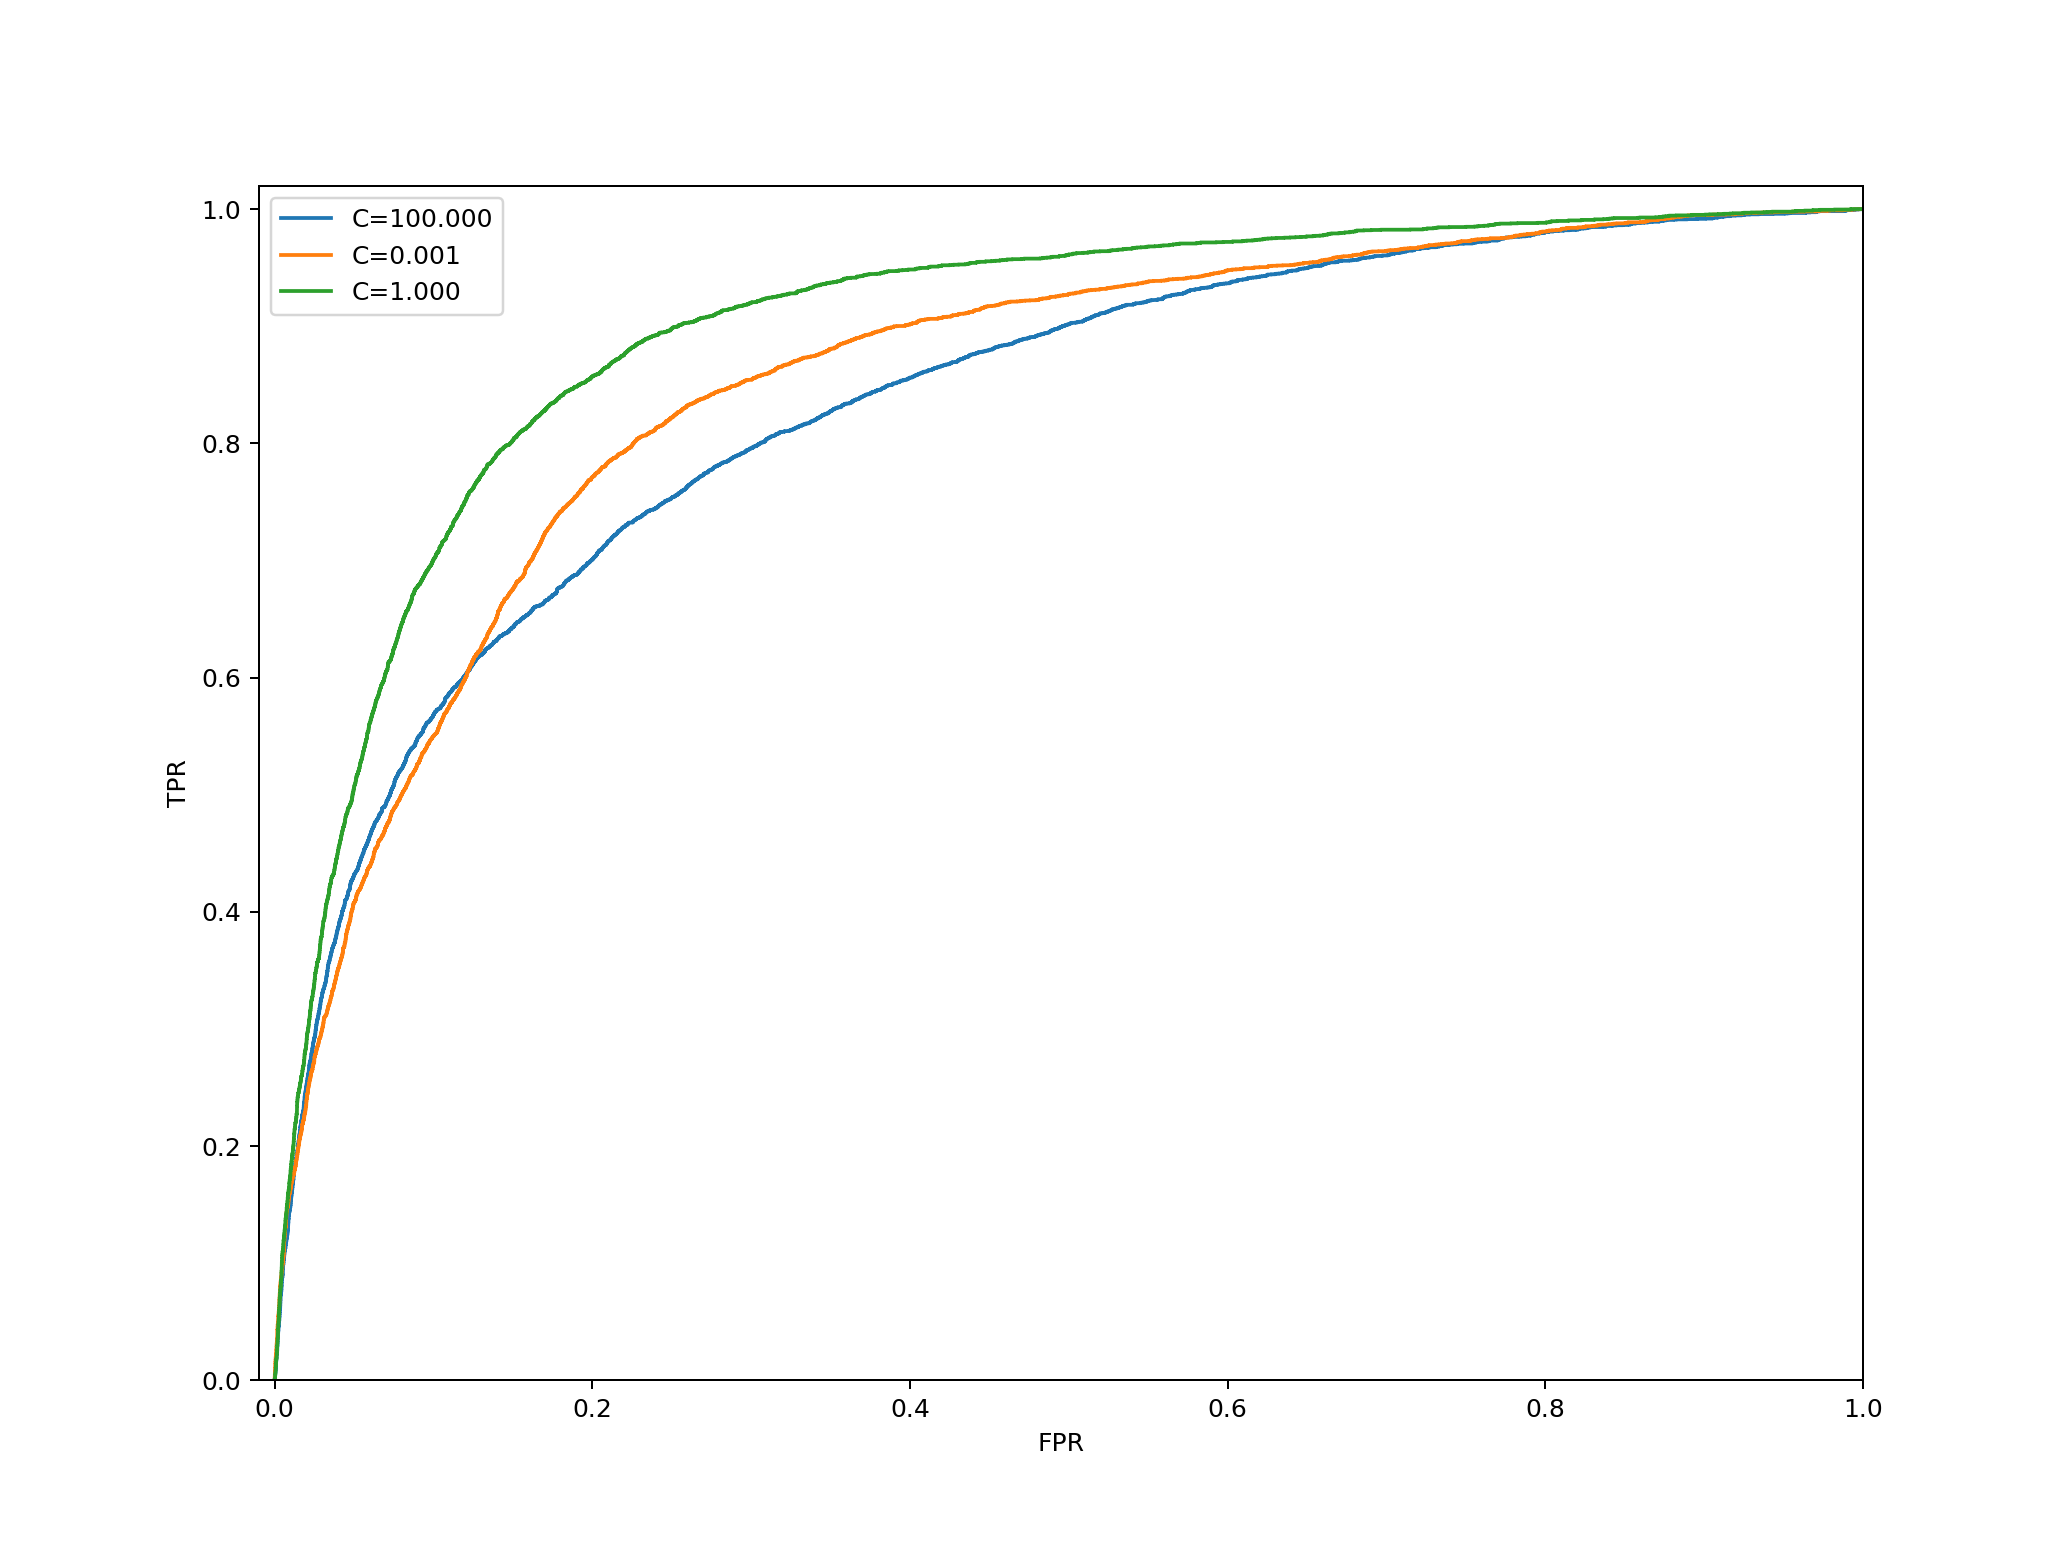

In [158]:
%matplotlib notebook

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

for c in [100, .001, 1]:
    svc = LinearSVC(C=c, random_state=0).fit(x_scaled, y)
    accuracy = svc.score(fx_test, fy_test)
    auc = roc_auc_score(y, svc.decision_function(x_scaled))
    fpr, tpr, _ = roc_curve(y, svc.decision_function(x_scaled))
    #print("gamma = {:.2f}  accuracy = {:.2f}  AUC = {:.2f}".format(gamma, accuracy, auc))
    plt.plot(fpr, tpr, label="C={:.3f}".format(c))
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.xlim(-0.01, 1)
plt.ylim(0, 1.02)
plt.legend(loc="best")

>Per the above ROC Curve, it is clear that the model performs the best on this dataset when the value of C=1.

In [223]:
svc

LinearSVC(C=1, random_state=0)

<IPython.core.display.Javascript object>


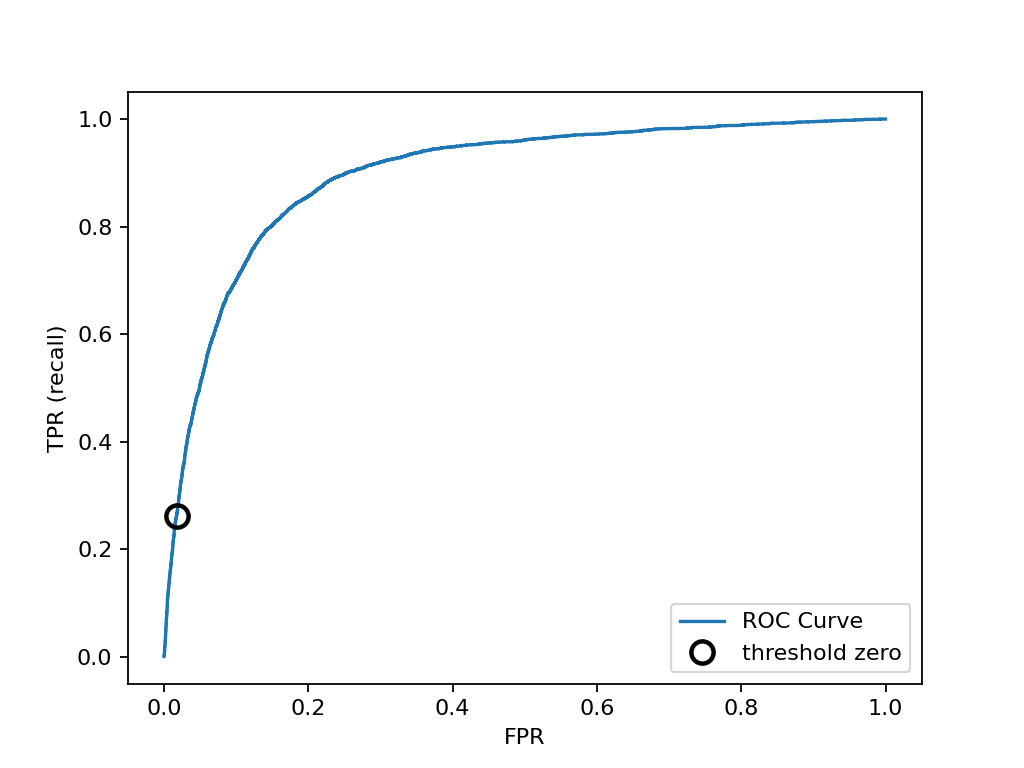

In [231]:
%matplotlib notebook 

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y, svc.decision_function(x_scaled))

plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds))
close_max = np.argmax(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

In [232]:
y_pred = np.where(svc.decision_function(x_scaled) > thresholds[close_zero], 1, 0)
print('Confusion matrix: \n', confusion_matrix(y, y_pred))

Confusion matrix: 
 [[36134   639]
 [ 3258  1157]]


In [238]:
print(fpr[close_zero])
print(tpr[close_zero])

0.017376879775922553
0.2622876557191393


>The above threshold value aims to minimize the FPR, thereby minimizing the number of individuals marketed to who are not likely to subscribe to a term deposit. This is the most conservative threshold value. Per the above confusion matrix, there are only 639 false positives as opposed to 1157 true positives. So, the bank would only pay for targeted ads for 639 individuals who would not subscribe to a term deposit and would pay for targeted ads for 1157 individuals who would subscribe to a term deposit. Clearly, the bank would market to far more individuals who are likely to subscribe to a term deposit.

In [233]:
# refreshes the graph
plt.clf()
plt.cla()
plt.close()

>Since the ROC curve is relatively steep, it is possible to increase the true positive rate while maintaining an acceptable value for the false positive rate. So, the threshold values can be made less strict if the bank increases its marketing budget and wants to market to more potential subscribers. Although more money would be spent on marketing to those who do not sign up, more overall customers will subscribe. Ultimately, a less conservative threshold could benefit the bank if its goal is to maximize revenue, and if targeted ads are relatively inexpensive.
<br><br>
>It is possible to scale the model up to include more potential subscribers, albeit with a higher error rate, by simply increasing the threshold value. This may be useful for the bank if they intend to market more aggressively in an environment where there is a positive economic outlook. Increasing the threshold of the the model will increase the recall of the model, but will reduce the precision. More of the positive values, or individuals who are likely to subscribe, will be correctly predicted, but there will be more false positive values.

In [245]:
#increasing the threshold value below will increase the size of the bank's target market, but will reduce the precision of the model
threshold_value = 3500

y_pred = np.where(svc.decision_function(x_scaled) > thresholds[threshold_value], 1, 0)
print('Confusion matrix: \n', confusion_matrix(y, y_pred))

Confusion matrix: 
 [[32092  4681]
 [ 1028  3387]]


<IPython.core.display.Javascript object>


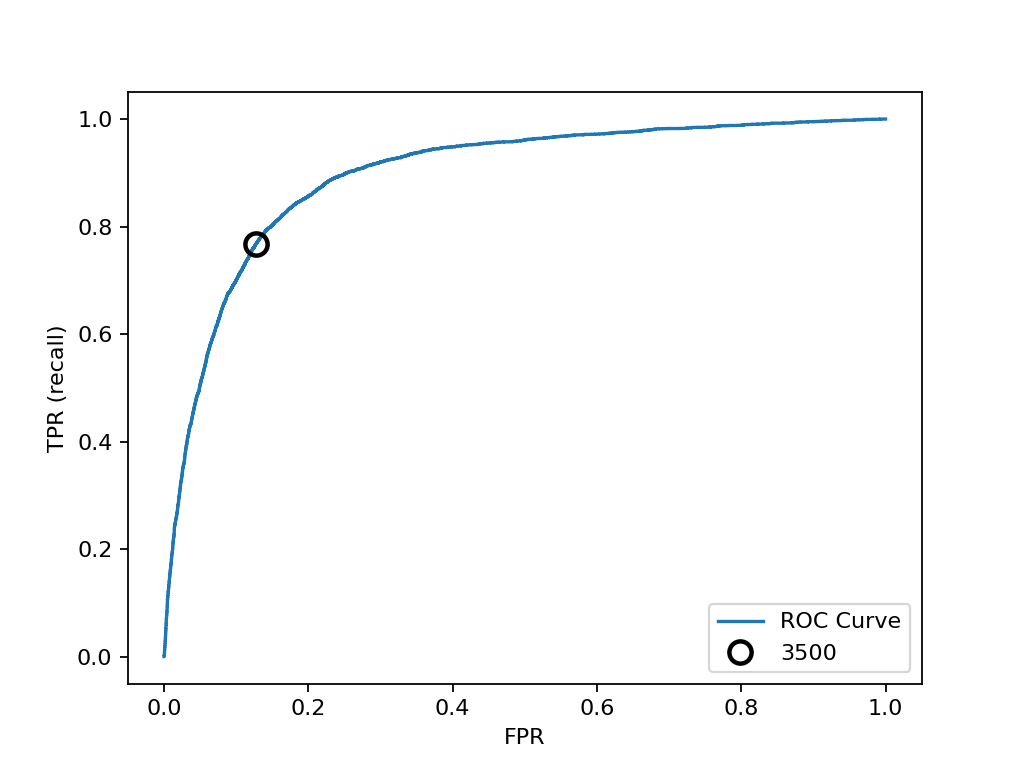

In [246]:
fpr, tpr, thresholds = roc_curve(y, svc.decision_function(x_scaled))

plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
# find threshold closest to zero
plt.plot(fpr[threshold_value], tpr[threshold_value], 'o', markersize=10,
         label=str(threshold_value), fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

In [247]:
print('false positive rate:   ' +str(fpr[threshold_value]))
print('true positive rate:    '+str(tpr[threshold_value]))
confusion_matrix(y,y_pred)

false positive rate:   0.1272944823647785
true positive rate:    0.7673839184597961


array([[32092,  4681],
       [ 1028,  3387]])

# Conclusion

>After establishing a threshold which maximizes TPR and minimizes FPR, you can see that the above LinearSVC model effectively classifies a significant portion of the potential customers in the dataset. Approximately 25% of the total number of those who would subscribe for a term deposit are correctly classified, and marketed to, per the conservative model. Furthermore, in the first model, the false positive rate is practically zero, which means that almost no marketing will be spent on those who will not subscribe to a term deposit. This means that the bank will be wasting almost no money on the bank's advertising budget by marketing to those who are unlikely to subscribe. This model could enable the bank to achieve a better return from its marketing budget. The second, less conservative model may enable the bank to achieve much greater revenue, but it may not necessarily be more profitable for the bank. Without information regarding the cost to send targeted ads and the profit from a term deposit subscriber, it is difficult to say which model may be better for the bank overall.

##### Scalability

>Increasing the threshold value to 3500 for the LinearSVC model would increase the TPR to .77 and the FPR to only .13. So, the model is now able to capture more of the overall positive values than the original model which only had a TPR of .26. In other words, the second model with the less conservative threshold would capture 77% of the total positive values (3387 individuals) as compared to only 26% of the positive individuals (1157 individuals). The second model would cause the bank to market to more individuals who would not subscribe to a term deposit (4681 false positives) than the first model (639 false positives) by a wide margin because the less conservative threshold is less precise. Again, this may be beneficial to the bank overall depending on how profitable each individual is that signs up for a term deposit, and the cost of marketing to an individual. With more information about the cost to deliver a targeted ad and the profit per individual who registers to a term deposit, this model could be optimized to maximize profit. However, without that information, all that can be done is illustrate how the model can be scaled up or down based on the banks' business operating environment and objectives by simply adjusting the threshold.

In [ ]:
best_model.